In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")


In [2]:
centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)


In [3]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_


print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[ 5.2484613   4.90744756  5.50001495]
 [ 1.28123846  1.43158837  1.89118027]
 [ 2.93509023  9.91882067 10.29398399]]
Number of estimated clusters: 3


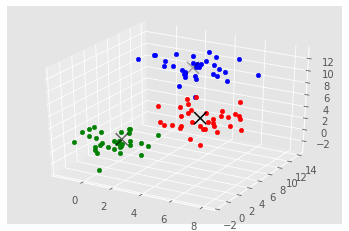

In [4]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import MeanShift
from sklearn import preprocessing, model_selection

In [53]:
import pandas as pd

df =pd.read_excel('titanic.xls')

original_df =pd.DataFrame.copy(df)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [55]:
df.drop(['name', 'body', 'sibsp', 'ticket'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,parch,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,2,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,2,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,2,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,2,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [56]:
df.fillna(0, inplace=True)
df.head()

,pclass,survived,sex,age,parch,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,2,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,2,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,2,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,2,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [57]:
def hndl_non_num(df):
    columns =df.columns.values
    
    for col in columns:
        text_digit_vals ={}
        def convert_to_int(vals):
            return text_digit_vals[vals]
        
        if df[col].dtype != np.int64 or df[col].dtype != np.float64 :
            col_content =df[col].values.tolist()
            unique_ele =set(col_content)
            
            x=0
            for uni in unique_ele:
                if uni not in text_digit_vals:
                    text_digit_vals[uni] =x
                    x+=1
                    
            df[col] =list(map(convert_to_int, df[col]))
            
            
    return df

In [58]:
df =hndl_non_num(df)
df.head()

,pclass,survived,sex,age,parch,fare,cabin,embarked,boat,home.dest
0,0,1,0,30,0,178,97,3,2,88
1,0,1,1,91,2,134,186,3,5,229
2,0,0,0,2,2,134,186,3,0,229
3,0,0,1,31,2,134,186,3,0,229
4,0,0,0,25,2,134,186,3,0,229


In [59]:
X =np.array(df.drop(['survived'], axis=1).astype(float))

y =np.array(df['survived'])

In [60]:
clf =MeanShift()
clf.fit(X)

"""
crt =0

for i in range(len(X)):
    x1 =np.array(X[i].astype(float))
    x1 =x1.reshape(-1, len(x1))
    prediction =clf.predict(x1)
    if prediction == y[i]:
        crt+=1
        
        
crt/len(X)    """    


labels =clf.labels_
cluster_cent =clf.cluster_centers_

original_df['cluster_group'] =np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] =labels[i]
    
n_cluster =len(np.unique(labels))

survival_rates ={}

for i in range(n_cluster):
    temp_df =original_df[ (original_df['cluster_group']==float(i)) ]
    survival_df =temp_df[(temp_df['survived']==1)]
    survival_rate =len(survival_df)/len(temp_df)
    survival_rates[i] =survival_rate
    
    
print(survival_rates)

{0: 0.3435960591133005, 1: 0.44466800804828976}


F:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
n_cluster

2

In [62]:
print(original_df[(original_df['cluster_group']==1)])

      pclass  survived                                             name  \
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
6          1         1                Andrews, Miss. Kornelia Theodosia   
...      ...       ...                                              ...   
838        3         0                     Gustafsson, Mr. Johan Birger   
839        3         0                      Gustafsson, Mr. Karl Gideon   
1063       3         0                   Nirva, Mr. Iisakki Antino Aijo   
1089       3         0                      Olsvigen, Mr. Thor Anderson   
1281       3         0                             Waelens, Mr. Achille   

         sex      age  sibsp  parch            ticket      fare    cabin  \
1       male   0.9167  

In [63]:
print(original_df[(original_df['cluster_group']==0)])

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
5          1         1                                Anderson, Mr. Harry   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
13         1         1                       Barber, Miss. Ellen "Nellie"   
...      ...       ...                                                ...   
1304       3         0                               Zabour, Miss. Hileni   
1305       3         0                              Zabour, Miss. Thamine   
1306       3         0                          Zakarian, Mr. Mapriededer   
1307       3         0                                Zakarian, Mr. Ortin   
1308       3         0                                 Zimmerman, Mr. Leo   

         sex   age  sibsp  parch    ticket      fare    cabin embarked boat

In [64]:
print(original_df[(original_df['cluster_group']==0)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  812.000000  812.000000  589.000000  812.000000  812.000000  811.000000   
mean     2.581281    0.343596   27.512875    0.480296    0.354680   28.060481   
std      0.742937    0.475201   13.540840    1.126239    0.867165   50.250757   
min      1.000000    0.000000    0.166700    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   20.000000    0.000000    0.000000    7.797900   
50%      3.000000    0.000000   26.000000    0.000000    0.000000    9.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   26.000000   
max      3.000000    1.000000   74.000000    8.000000    9.000000  512.329200   

             body  cluster_group  
count   71.000000          812.0  
mean   159.887324            0.0  
std    106.112413            0.0  
min      1.000000            0.0  
25%     64.000000            0.0  
50%    153.000000            0.0  
75%    273.500000        

In [65]:
print(original_df[(original_df['cluster_group']==1)].describe())

           pclass    survived         age       sibsp       parch        fare  \
count  497.000000  497.000000  457.000000  497.000000  497.000000  497.000000   
mean     1.826962    0.444668   32.933443    0.529175    0.434608   41.837902   
std      0.771361    0.497430   14.935838    0.886533    0.861503   53.081361   
min      1.000000    0.000000    0.333300    0.000000    0.000000    0.000000   
25%      1.000000    0.000000   23.000000    0.000000    0.000000   13.000000   
50%      2.000000    0.000000   31.000000    0.000000    0.000000   26.000000   
75%      2.000000    1.000000   44.000000    1.000000    1.000000   52.000000   
max      3.000000    1.000000   80.000000    5.000000    6.000000  512.329200   

             body  cluster_group  
count   50.000000          497.0  
mean   162.120000            1.0  
std     85.359657            0.0  
min     17.000000            1.0  
25%     99.250000            1.0  
50%    160.000000            1.0  
75%    242.750000        